# FUNCTION

In [47]:
import torch
import random
import torchvision
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import torch.utils.data as data
import torch.nn as nn
import tool
%matplotlib inline
import importlib
importlib.reload(tool)

<module 'tool' from 'c:\\Users\\XiaoXin\\Documents\\code\\ONE\\tool.py'>

In [3]:
class mnist_data(data.Dataset):
    def __init__(self,x,y):
        self.x=x.float()
        self.y=y.float()
    def __len__(self):
        return len(self.x)
    def __getitem__(self,index):
        if self.y is not None:
            return self.x[index].reshape([-1]),self.y[index]
        else:
            return self.x[index].reshape([-1])


In [62]:
class Auto_Learning(nn.Module):
    def __init__(self,input_a,hidden1_a,hidden2_a,hidden3_a,rand_seed=10,device=torch.device('cpu')):
        torch.manual_seed(rand_seed)
        super(Auto_Learning,self).__init__()
        input_a=input_a*input_a
        hidden1_a*=hidden1_a
        hidden2_a*=hidden2_a
        hidden3_a*=hidden3_a
        self.device=device

        self.net=nn.Sequential(
            nn.Linear(input_a,hidden1_a),
            nn.ReLU(),
            # nn.Linear(hidden1_a,hidden2_a),
            # nn.ReLU(),
            # nn.Linear(hidden2_a,hidden3_a),
            # nn.ReLU(),
            # nn.Linear(hidden3_a,hidden2_a),
            # nn.ReLU(),
            # nn.Linear(hidden2_a,hidden1_a),
            # nn.ReLU(),
            nn.Linear(hidden1_a,input_a),
            nn.ReLU()
        )
        self.lossF=nn.MSELoss()
    def forward(self,input):
        input=input.to(self.device)
        return self.net(input)
    
    def trainF(self,train_data,valid_data,learning_rate=0.1,epoch=100,epoch_per=10,batch_size=128,optim=None):
        lossF=self.lossF
        if optim is None:
            optim=torch.optim.Adam(self.parameters(),lr=learning_rate)
        loader=data.DataLoader(train_data,batch_size=batch_size)
        train_record=[]
        valid_record=[]

        for i in range(epoch):
            train_loss=0.0
            pb=tool.ProgressBar(epoch_per*len(train_data))
            for k in range(epoch_per):
                for x,_ in loader:
                    x=x.to(device)
                    optim.zero_grad()
                    res=self(x)
                    loss=lossF(res,x)
                    loss.backward()
                    optim.step()
                    train_loss+=loss.tolist()*len(x)
                    pb.step(len(x))
                    pass
            #compute
            pb.end()
            train_loss/=len(train_data)
            train_loss/=epoch_per
            train_record.append(train_loss)
            valid_loss=self.valid(valid_data)
            valid_record.append(valid_loss)
            #print
            print(f'{i}\t{train_loss:.4f}\t{valid_loss:.4f}')
    
        return train_record,valid_record
    def valid(self,valid_data,batch_size=128):
        lossF=self.lossF
        loader=data.DataLoader(valid_data)
        total_loss=0.0
        for x,_ in loader:
            x=x.to(self.device)
            res=self(x)
            loss=lossF(res,x).tolist()
            total_loss+=loss*len(x)
        return total_loss/len(valid_data)




# CODE

## data

In [10]:
mnist=torchvision.datasets.MNIST('./mnist',download=True)

100.1%Extracting ./mnist\MNIST\raw\train-images-idx3-ubyte.gz to ./mnist\MNIST\raw
113.5%Extracting ./mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist\MNIST\raw
100.4%Extracting ./mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist\MNIST\raw
180.4%Extracting ./mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist\MNIST\raw
Processing...
Done!


In [11]:
train_x,test_x=tool.data_split(mnist.train_data,rand=20)
train_y,test_y=tool.data_split(mnist.train_labels,rand=20)
train_x,valid_x=tool.data_split(train_x,rand=10)
train_y,valid_y=tool.data_split(train_y,rand=10)

In [12]:
train_data=mnist_data(train_x,train_y)
valid_data=mnist_data(valid_x,valid_y)
test_data=mnist_data(test_x,test_y)

In [13]:
train_data[0][0].shape

torch.Size([784])

In [14]:
print(len(train_data))
print(len(valid_data))
print(len(test_data))

38400
9600
12000


# AUTO_LEARNING

In [77]:
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [87]:
ALmodel=Auto_Learning(28,15,15,10,device=device).to(device)
print(ALmodel)

Auto_Learning(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=225, bias=True)
    (1): ReLU()
    (2): Linear(in_features=225, out_features=784, bias=True)
    (3): ReLU()
  )
  (lossF): MSELoss()
)


In [86]:
tr,vr=ALmodel.trainF(train_data,valid_data,learning_rate=0.001,batch_size=10,epoch_per=1)

100.00%0	3065.9451	3111.4798
33.62%

KeyboardInterrupt: 

In [73]:
ALmodel.device

device(type='cuda')

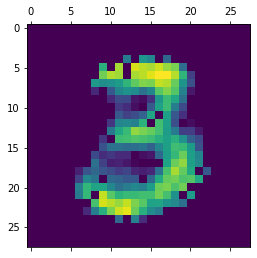

In [83]:
plt.matshow(ALmodel(train_data[0][0].reshape([-1])).reshape([28,28]).detach().cpu())

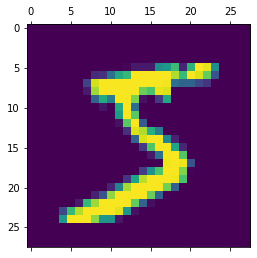

In [85]:
plt.matshow(train_data[0][0].reshape([28,28]))